In [1]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization (plt.style.available)
plt.style.use('_mpl-gallery')
FONT = {'fontsize':15, 'fontstyle':'normal', 'backgroundcolor':'#342D7E', 'color':'#FFFFFF'} # for plot title

In [2]:
# import requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# **DATA IMPORT**

In [4]:
#Read Data

df = pd.read_csv("Data/bank_loan.csv")

In [5]:
df = pd.DataFrame(df)
df

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91108       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


**According to above information:**

Dataset has **5000** datapoints.
Dataset has 14 columns including:
13 columns by int64 type: ***ID, Age, Experience, Income, ZIP Code, Family, Education, Moragage, Personal Loan, Securities Account, CD Account, Online and CreditCard***

1 column by object type: ***CCAvg***

Target is ***Personal Loan*** column and other columns are features.
It seems that there is no missing value, but there may be invalid values, so we will check this case further.

# **DATA CLEANING**





The **/ symbol** in column CCAvg appears to be a decimal number.  
As a result, we start by replacing the CCAvg column.  rather than /, and then change the **CCAvg type to float64**.

# **REPLACE AND DATA TYPE CHANGE**

In [7]:
# Replace
df['CCAvg'] = df['CCAvg'].str.replace('/' , '.').astype('float64')
df.head()


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91108       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
# Data Type Check
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
# Display Row Upto 30
pd.set_option('display.max_rows', 30)

In [10]:
# Describe
round(df.describe().T,2)

count      mean      std     min       25%      50%  \
ID                  5000.0   2500.50  1443.52     1.0   1250.75   2500.5   
Age                 5000.0     45.34    11.46    23.0     35.00     45.0   
Experience          5000.0     20.10    11.47    -3.0     10.00     20.0   
Income              5000.0     73.77    46.03     8.0     39.00     64.0   
ZIP Code            5000.0  93152.50  2121.85  9307.0  91911.00  93437.0   
Family              5000.0      2.40     1.15     1.0      1.00      2.0   
CCAvg               5000.0      1.94     1.75     0.0      0.70      1.5   
Education           5000.0      1.88     0.84     1.0      1.00      2.0   
Mortgage            5000.0     56.50   101.71     0.0      0.00      0.0   
Personal Loan       5000.0      0.10     0.29     0.0      0.00      0.0   
Securities Account  5000.0      0.10     0.31     0.0      0.00      0.0   
CD Account          5000.0      0.06     0.24     0.0      0.00      0.0   
Online              5000.0      0.60     0.49     0.0      0.00      1.0   
CreditCard          5000.0      0.29     0.46     0.0      0.00      0.0   

                         75%      max  
ID                   3750.25   5000.0  
Age                    55.00     67.0  
Experience             30.00     43.0  
Income                 98.00    224.0  
ZIP Code            94608.00  96651.0  
Family                  3.00      4.0  
CCAvg                   2.50     10.0  
Education               3.00      3.0  
Mortgage              101.00    635.0  
Personal Loan           0.00      1.0  
Securities Account      0.00      1.0  
CD Account              0.00      1.0  
Online                  1.00      1.0  
CreditCard              1.00      1.0

The negative value in the **Experience** column is illogical, so we assume it was positive due to lack of data owner access, **converting the negative numbers into positive ones for further analysis**.

In [11]:
df[df['Experience'] < 0]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89           0              0                   0           0       0   
226          0              0                   0           0       0   
315          0              0                   0           0       1   
451         89              0                   0           0       1   
524          0              0                   0           0       1   
...        ...            ...                 ...         ...     ...   
4411         0              0                   0           0       1   
4481         0              0                   0           0       1   
4514         0              0                   0           0       1   
4582         0              0                   0           0       1   
4957         0              0                   0           0       0   

      CreditCard  
89             1  
226            0  
315            0  
451            0  
524            0  
...          ...  
4411           1  
4481           0  
4514           0  
4582           0  
4957           1  

[52 rows x 14 columns]

In [12]:
# Convert Negetive to Positive
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()

In [13]:
df.isna().sum().to_frame().T

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   0    0           0       0         0       0      0          0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           0       0           0

**Dataset has No missing value**

# **UNIQUE VALUE CHECK**

In [14]:
# Unique Value

for col in df:
  print(f"{col} has {df[col].nunique()} Unique Value.")

ID has 5000 Unique Value.
Age has 45 Unique Value.
Experience has 44 Unique Value.
Income has 162 Unique Value.
ZIP Code has 468 Unique Value.
Family has 4 Unique Value.
CCAvg has 108 Unique Value.
Education has 3 Unique Value.
Mortgage has 347 Unique Value.
Personal Loan has 2 Unique Value.
Securities Account has 2 Unique Value.
CD Account has 2 Unique Value.
Online has 2 Unique Value.
CreditCard has 2 Unique Value.


In [15]:
categorical_columns = ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']

for col in categorical_columns:

  print(f"{df[col].value_counts()}")
  print("-"*50)


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
0    4520
1     480
Name: Personal Loan, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: Securities Account, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CD Account, dtype: int64
--------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


**Based on the results and column types, it is concluded that there are no invalid values.**




In [16]:
df.duplicated().sum()

0

**There is no duplicate data.**




# **DROP COLUMNS**

**Remove Columns that not need to create model.**

---

1.   ID
2.   ZIP Code




In [17]:
df.drop(['ID','ZIP Code'], axis = 1, inplace = True)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

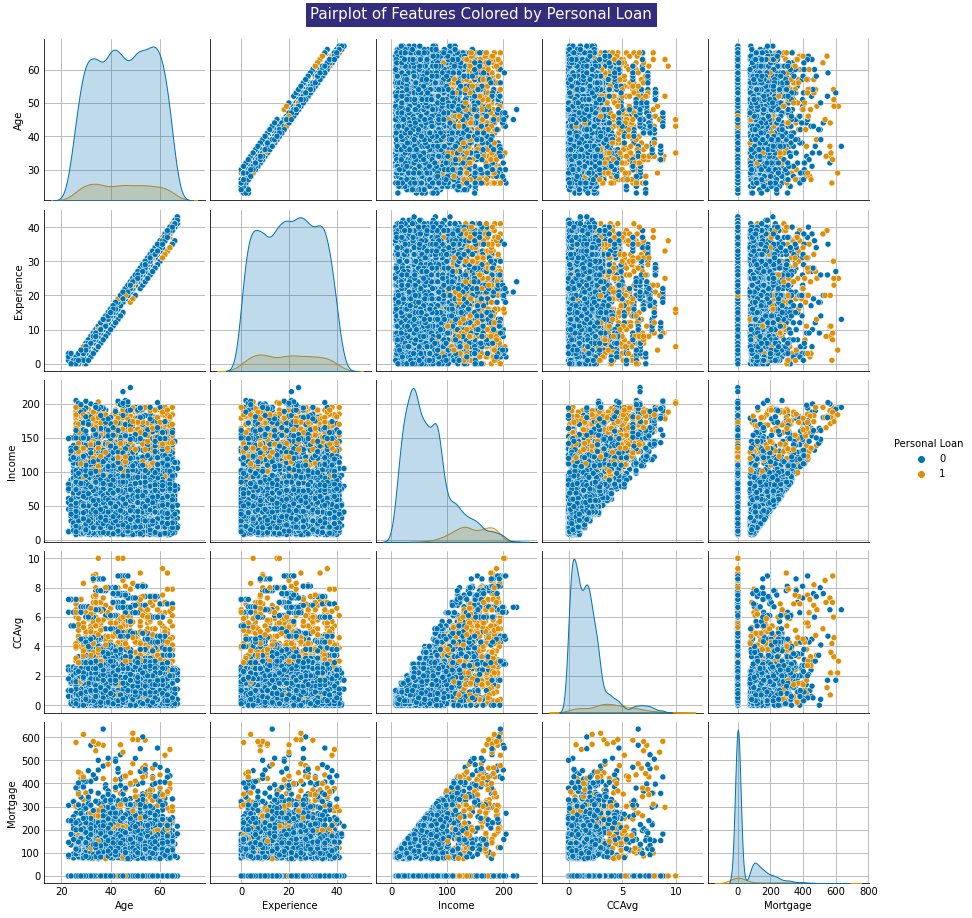

In [18]:
categorical_columns1 = ['Family','Education','Securities Account','CD Account','Online','CreditCard']

sns.pairplot(df.loc[:, ~df.columns.isin(categorical_columns1)], hue='Personal Loan', palette='colorblind', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by Personal Loan', y=1.02, **FONT)
plt.show()

In [19]:
# Converted Yearly to Monthly income

df['Income'] = round(df['Income']/12,2)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

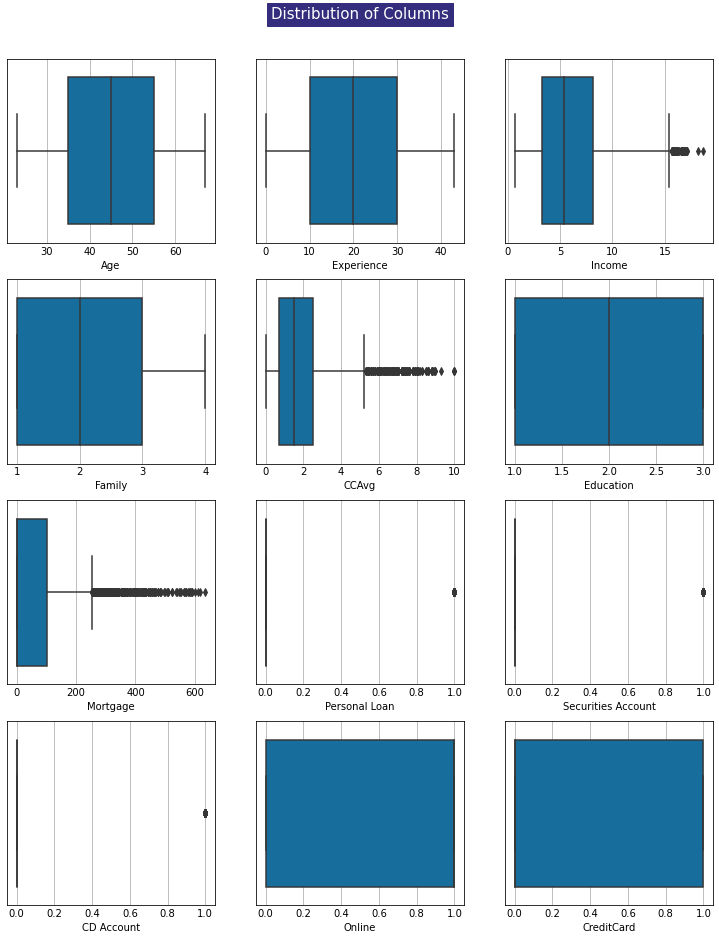

In [20]:
sns.set_palette('colorblind')

fig, ax = plt.subplots(4,3,figsize=(10,12))

for i, col in enumerate(df):
    sns.boxplot(df[col], ax=ax[i//3, i%3])
fig.suptitle('Distribution of Columns', y=1.05, **FONT)
plt.show()

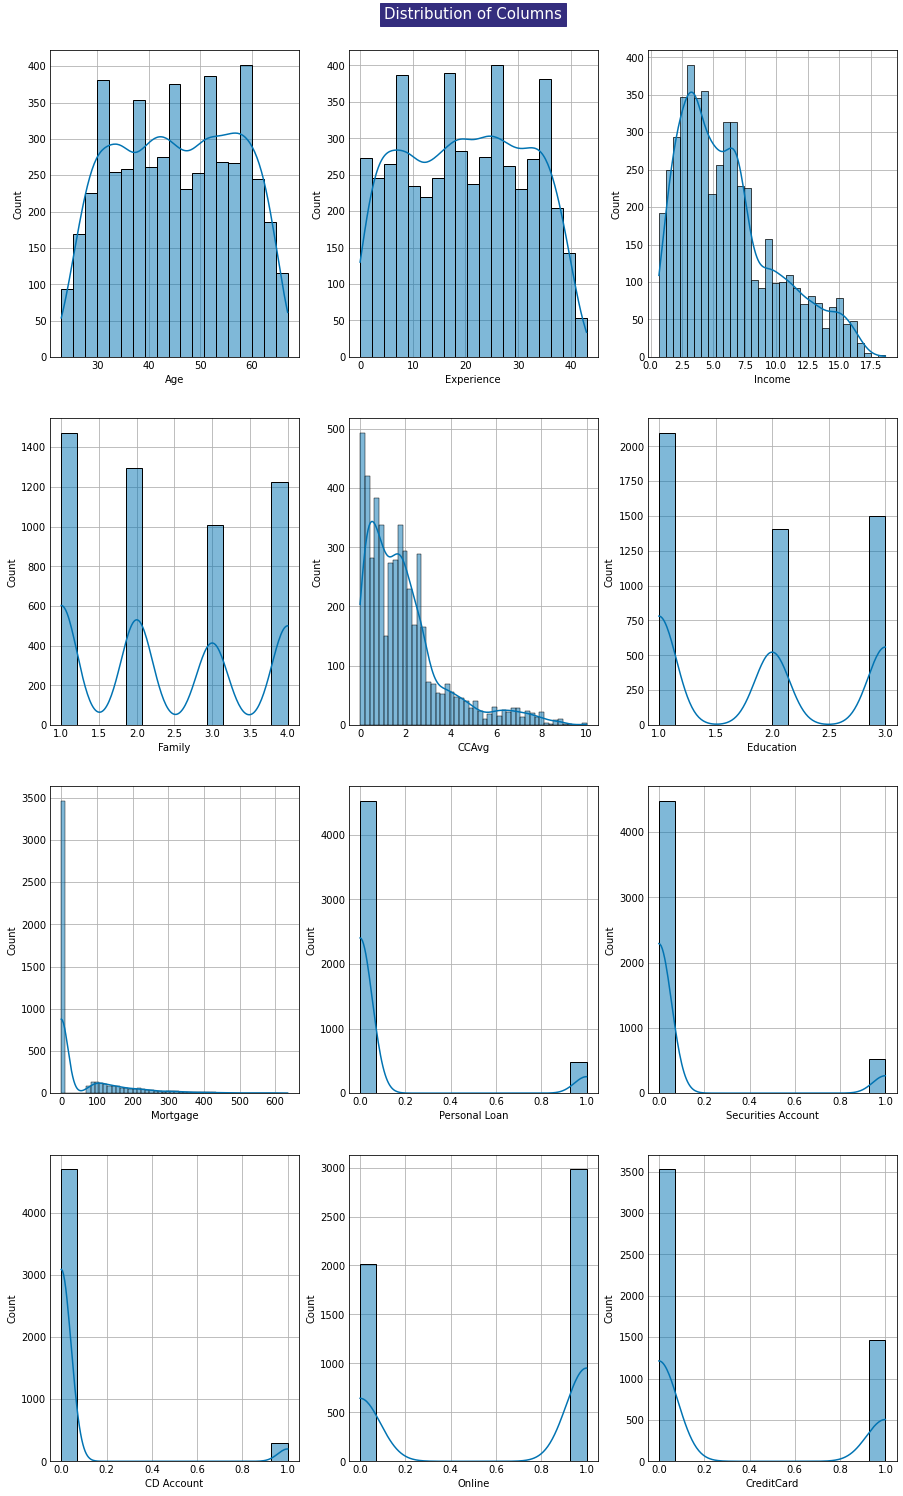

In [21]:
sns.set_palette('colorblind')

fig, ax = plt.subplots(4,3,figsize=(12,20))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
fig.suptitle('Distribution of Columns', y=1.02, **FONT)
plt.show()

# **UNIVARIATE ANALYSIS**

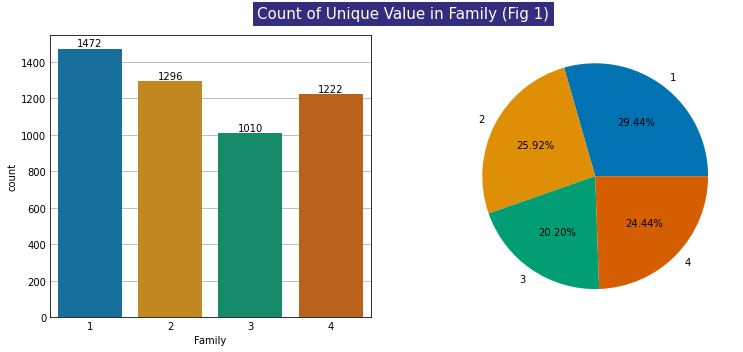

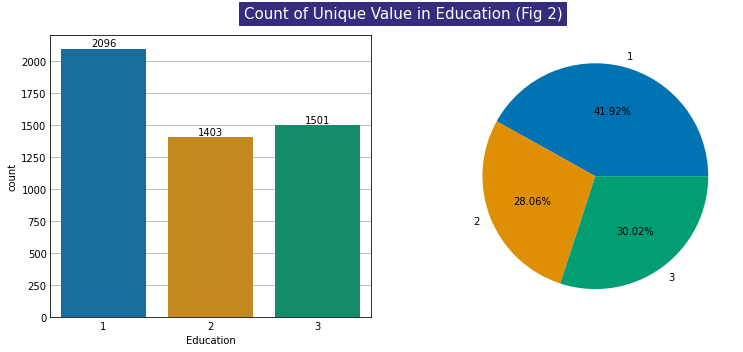

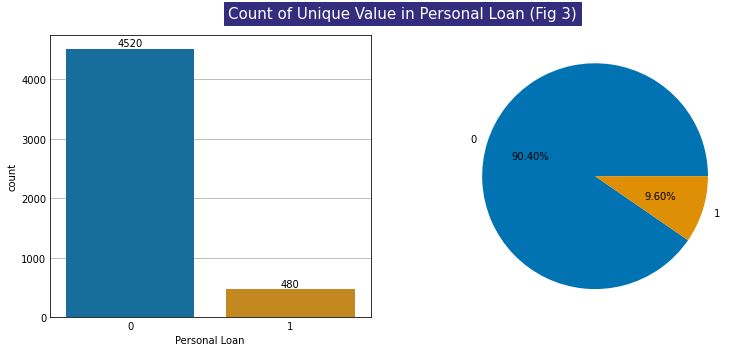

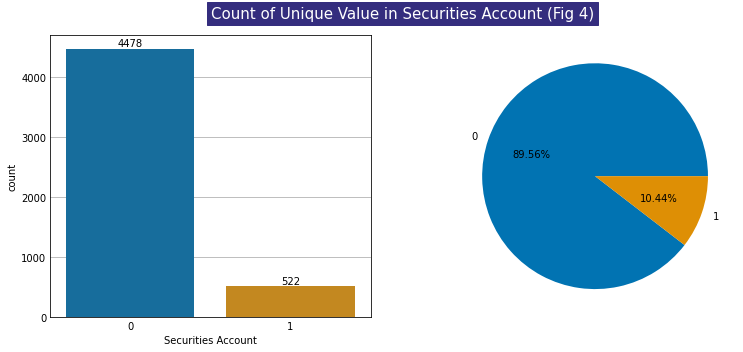

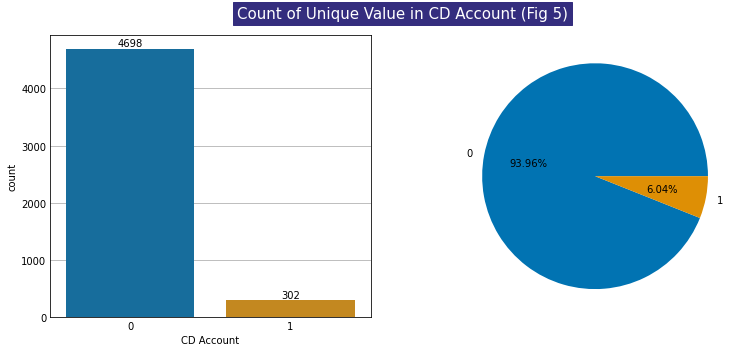

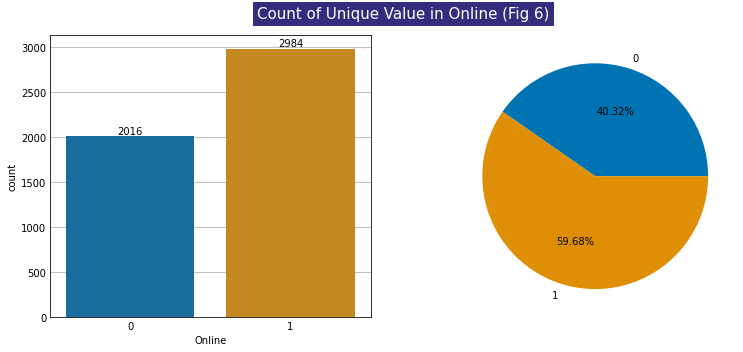

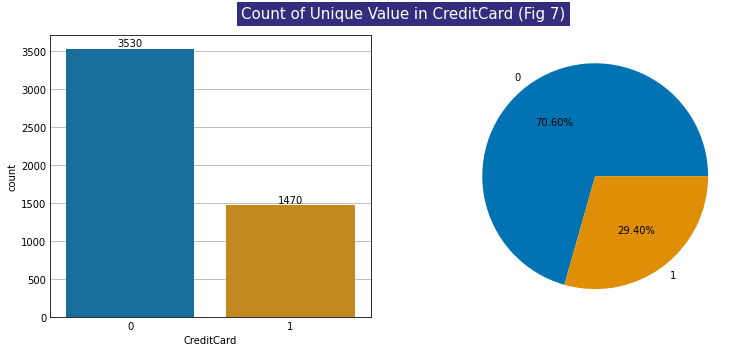

In [22]:
sns.set_palette("colorblind")

for i, col in enumerate(categorical_columns):

  fig, axes = plt.subplots(1,2,figsize=(10,4))

  sns.countplot(data=df, x=col, ax=axes[0])

  for container in axes[0].containers:
    axes[0].bar_label(container)
# count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=False, autopct='%1.2f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()

In [23]:
df.loc[:, ~df.columns.isin(categorical_columns)].describe().T

count       mean         std    min    25%    50%     75%     max
Age         5000.0  45.338400   11.463166  23.00  35.00  45.00   55.00   67.00
Experience  5000.0  20.134600   11.415189   0.00  10.00  20.00   30.00   43.00
Income      5000.0   6.147912    3.836233   0.67   3.25   5.33    8.17   18.67
CCAvg       5000.0   1.937938    1.747659   0.00   0.70   1.50    2.50   10.00
Mortgage    5000.0  56.498800  101.713802   0.00   0.00   0.00  101.00  635.00

# **BIVARIATE ANALYSIS**

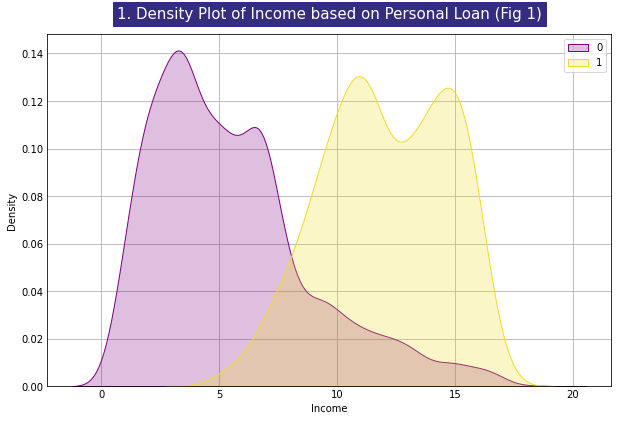

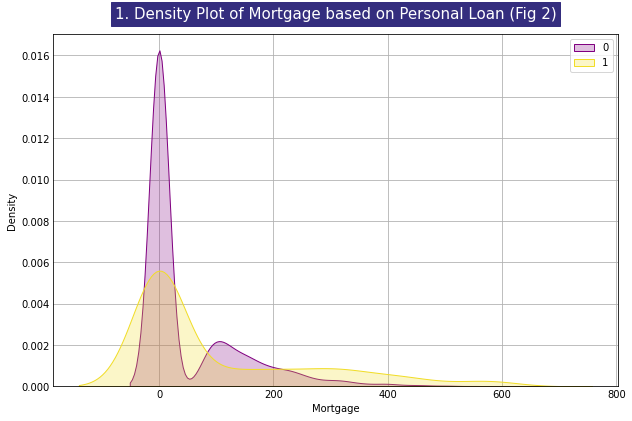

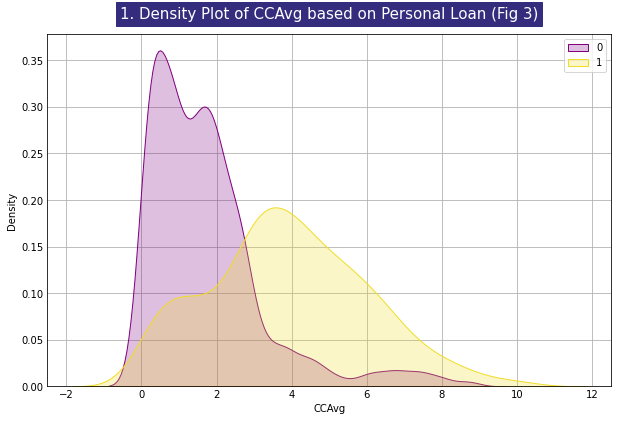

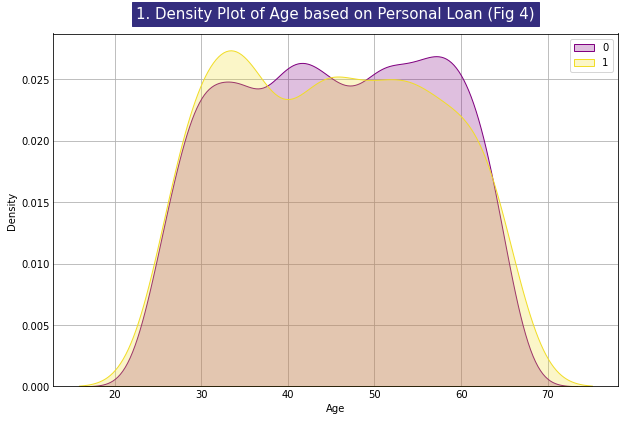

In [24]:
numeric_columns = ['Income','Mortgage','CCAvg','Age']
%matplotlib inline
plt.style.use("_mpl-gallery")
sns.set_palette(["#800080","#F1DD27"])
for j, col in enumerate(numeric_columns):
    plt.figure(figsize=(8, 5))
    for i, label in enumerate(df['Personal Loan'].unique().tolist()):
        sns.kdeplot(df.loc[df['Personal Loan'] == label, col], label = label, shade=True)
    plt.title(f'1. Density Plot of {col} based on Personal Loan (Fig {j+1})', fontdict=FONT, pad=15)
    plt.legend()
    plt.show()

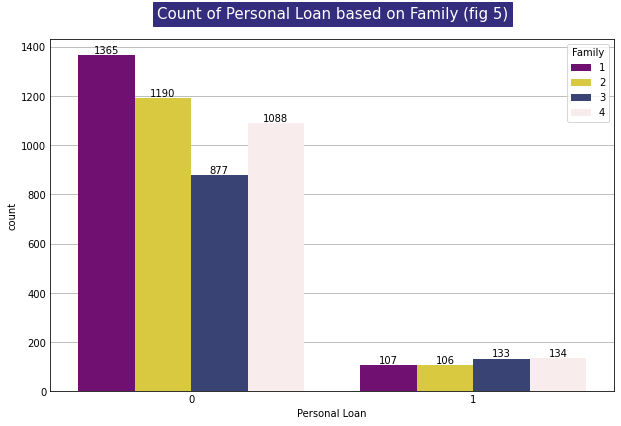

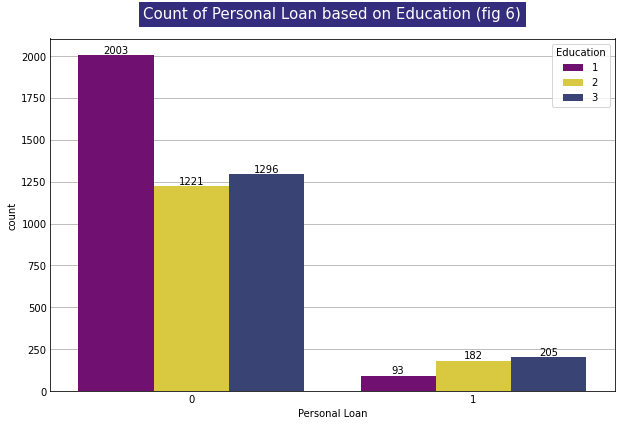

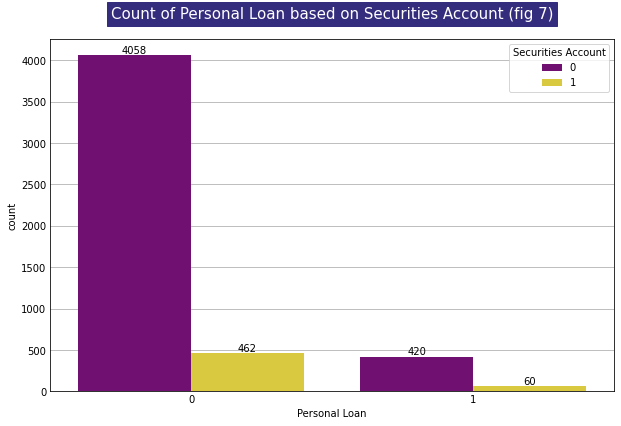

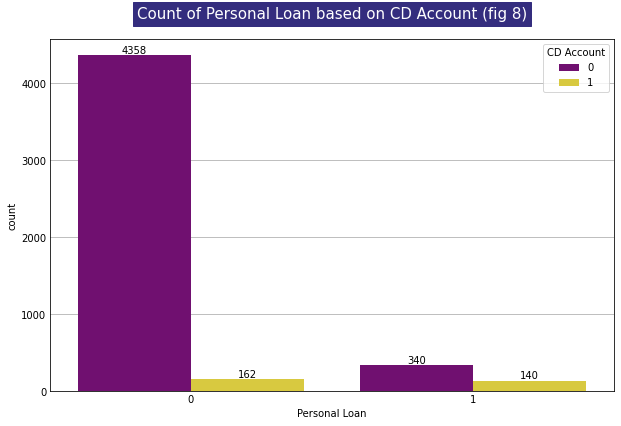

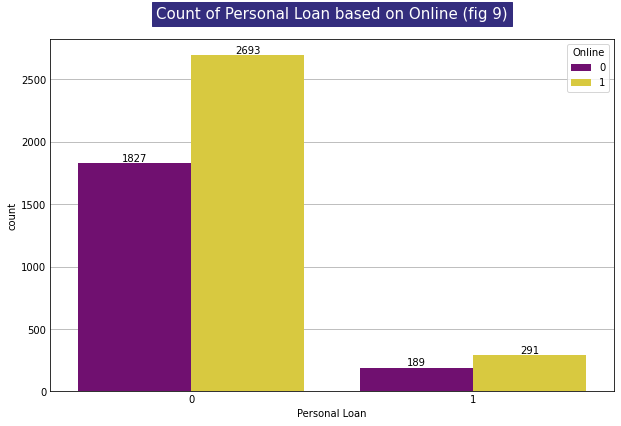

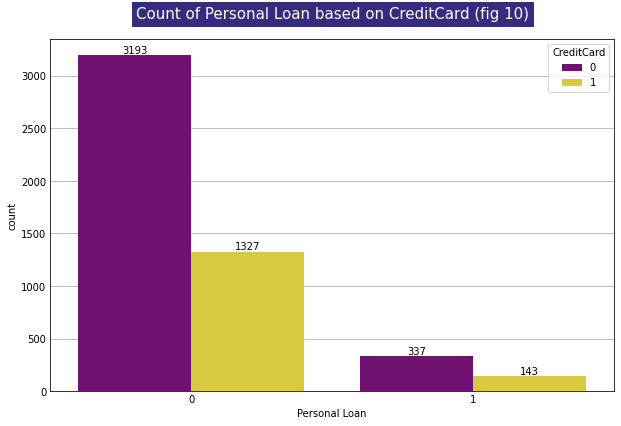

In [25]:
%matplotlib inline
plt.style.use("_mpl-gallery")
sns.set_palette(["#800080", "#F1DD27",'#2F3C7E', '#FBEAEB'])
categorical_columns2 = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for i, col in enumerate(categorical_columns2):
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x='Personal Loan', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Personal Loan based on {col} (fig {i+5})',fontdict=FONT,pad=20)
    plt.show()

______________________________ Mean of Income in Each Categorical Feature ______________________________


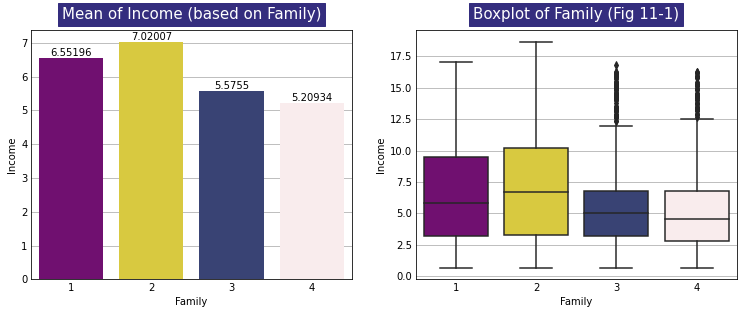

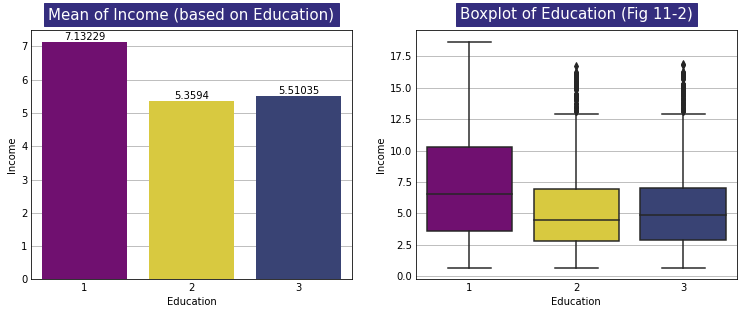

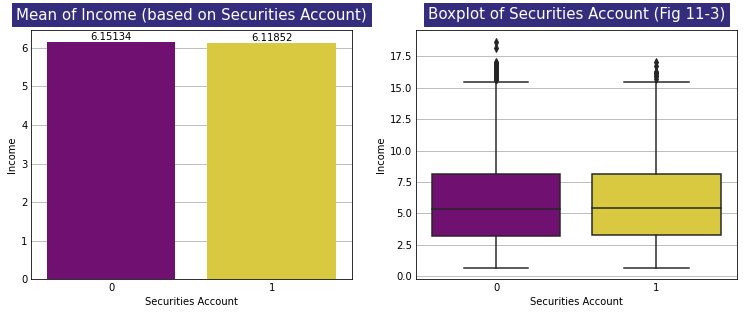

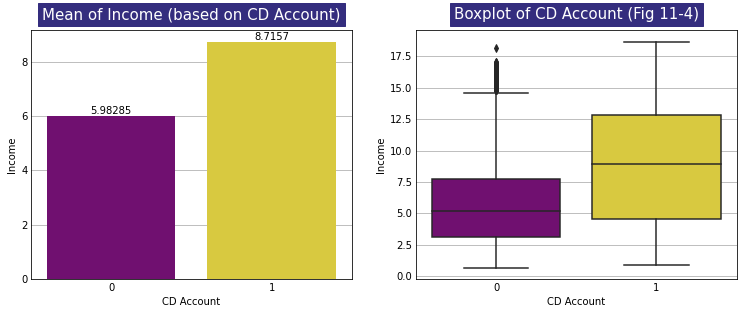

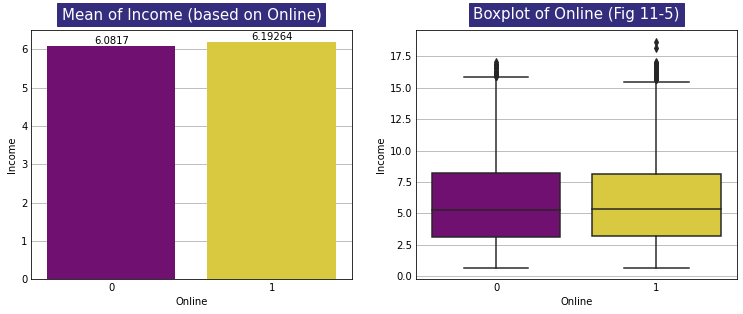

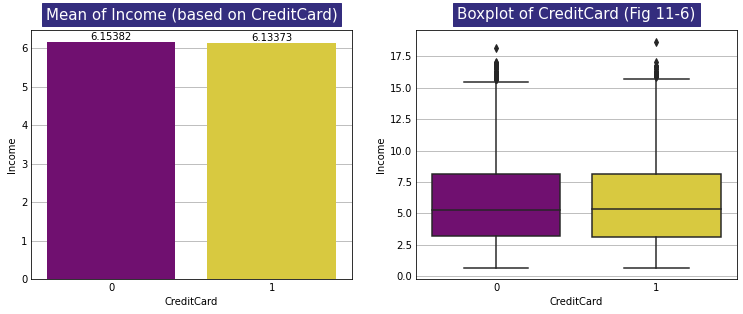

______________________________ Mean of CCAvg in Each Categorical Feature ______________________________


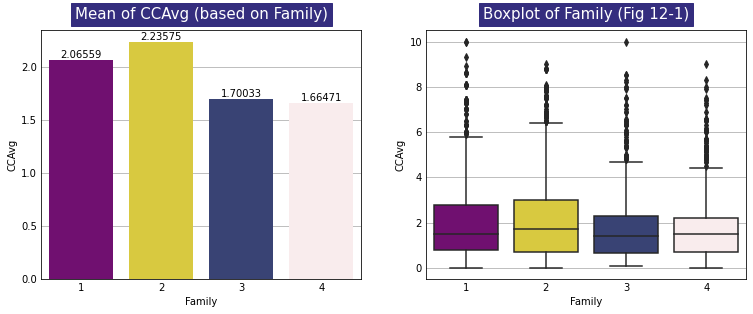

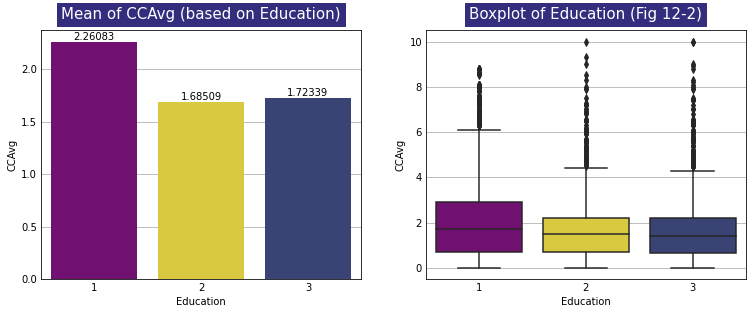

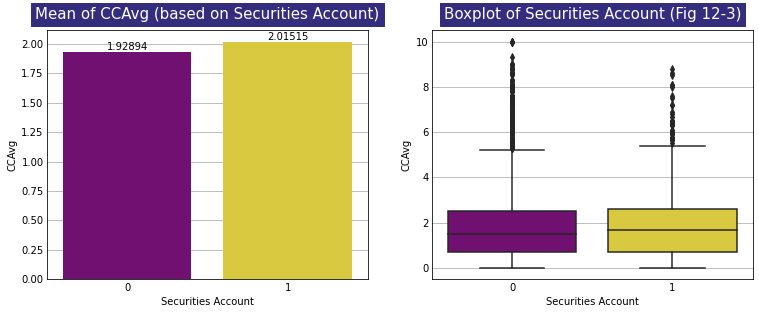

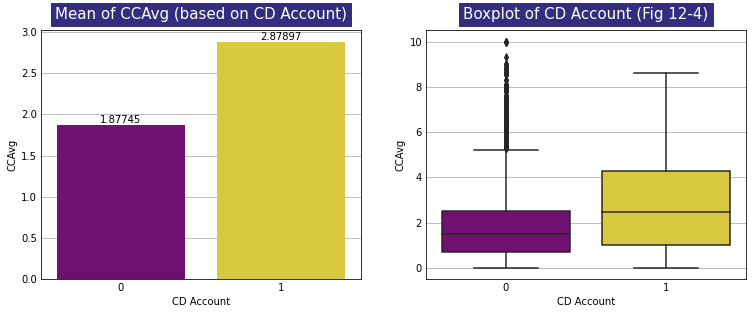

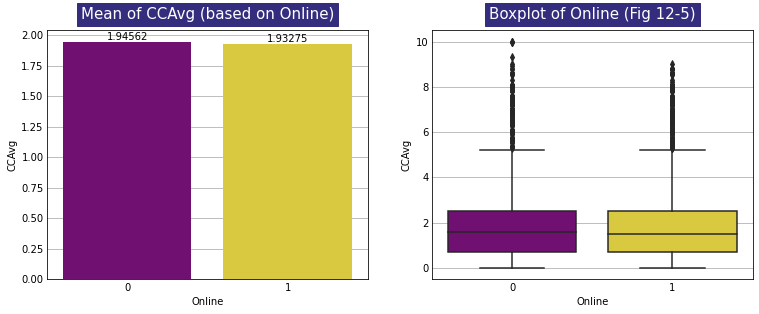

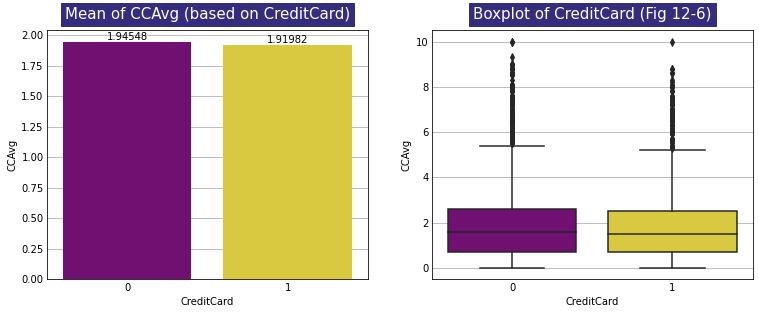

______________________________ Mean of Mortgage in Each Categorical Feature ______________________________


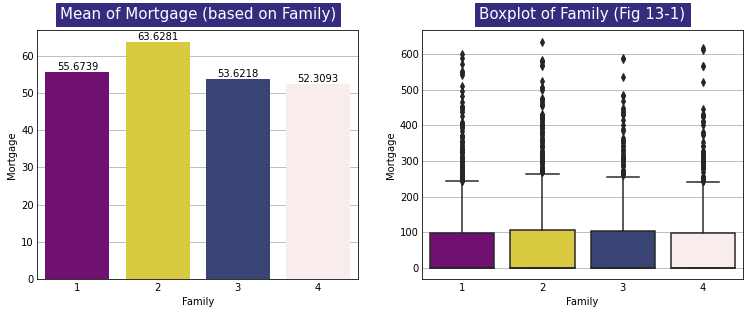

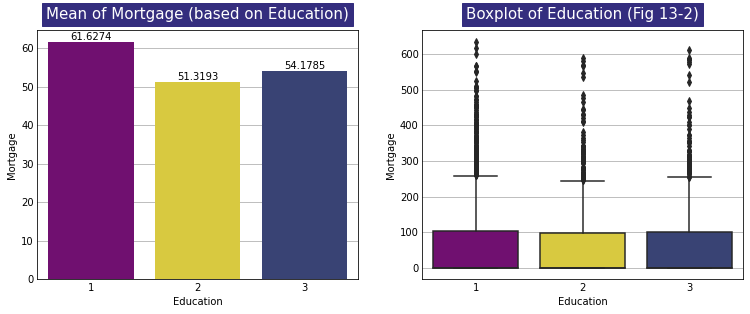

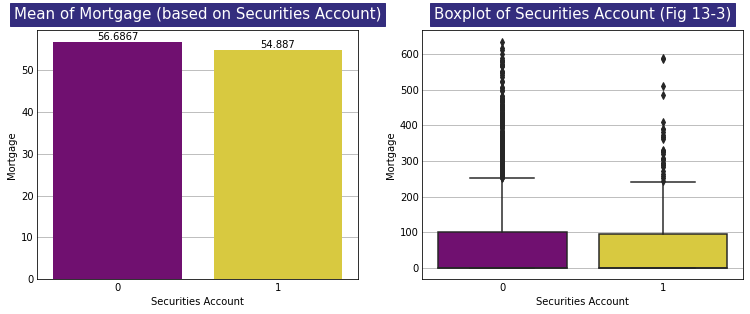

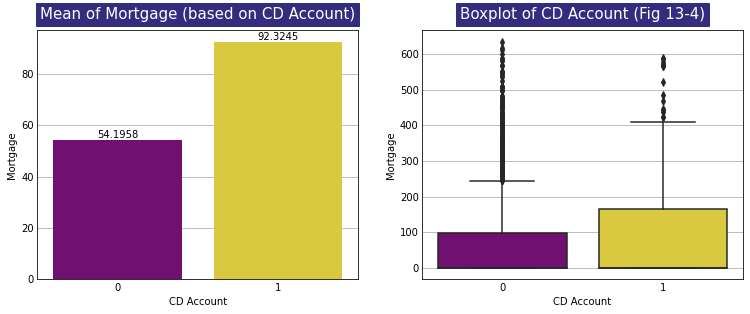

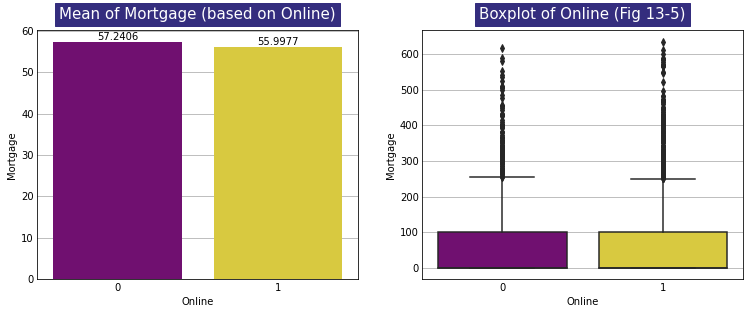

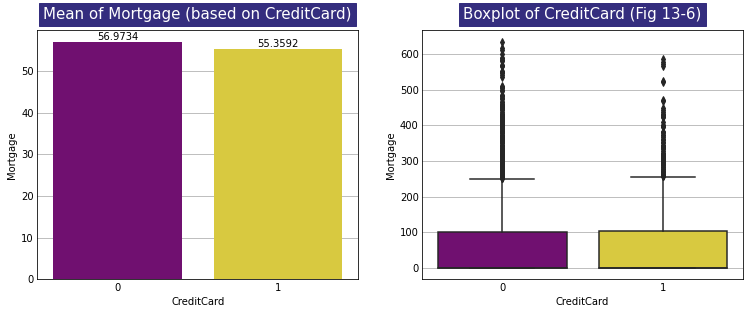

In [26]:
# Mean of Income and CCAvg based on each feature

plt.style.use("_mpl-gallery")

%matplotlib inline
sns.set_palette(["#800080", "#F1DD27",'#2F3C7E', '#FBEAEB'])
for i, col in enumerate(['Income','CCAvg','Mortgage']):
  print("_"*30,f'Mean of {col} in Each Categorical Feature',"_"*30)
  for j, cat in enumerate(categorical_columns2):
    fig , ax= plt.subplots(1,2, figsize=(10,4))
    gp = df.groupby([cat])[col].mean().to_frame().reset_index()
    sns.barplot(data = gp, x=cat, y=col, ax=ax[0])
    for container in ax[0].containers:
      ax[0].bar_label(container)
      ax[0].set_title(f'Mean of {col} (based on {cat})',y=1.02,**FONT)
      sns.boxplot(data=df, x=cat, y=col, ax=ax[1])
      ax[1].set_title(f'Boxplot of {cat} (Fig {i+11}-{j+1})', y=1.02, **FONT)
      plt.show()


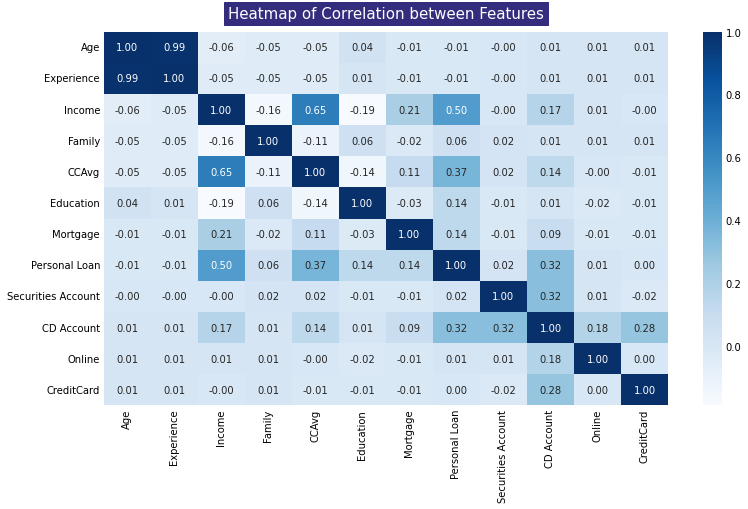

In [27]:
#heatmap of correlation between columns

plt.figure(figsize=(10, 6))
sns.heatmap(round(df.corr(),2),annot=True, cmap='Blues', fmt='.2f')
plt.title("Heatmap of Correlation between Features", **FONT,y=1.02)
plt.show()

# MULTIVARIATE ANALYSIS

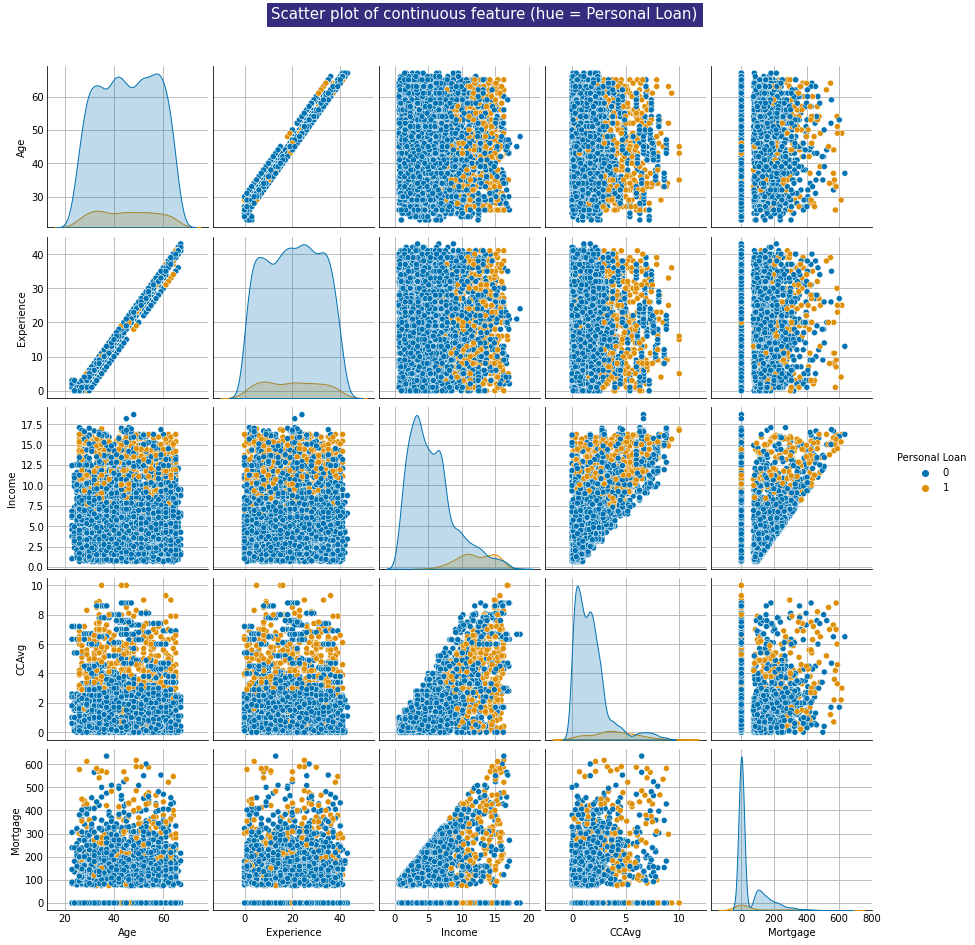

In [28]:
# draw pairplot with hue = Personal Loan

sns.set_palette('colorblind')

splot = sns.pairplot(data=df, x_vars=['Age','Experience','Income','CCAvg','Mortgage'], y_vars=['Age','Experience','Income','CCAvg','Mortgage'], hue='Personal Loan')
splot.fig.suptitle('Scatter plot of continuous feature (hue = Personal Loan)', y=1.05, **FONT)
plt.show()

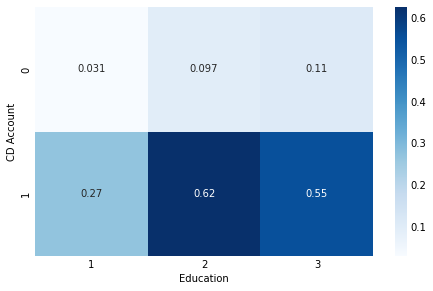

In [29]:
results = pd.pivot_table(data=df, index='CD Account', columns='Education', values='Personal Loan')
sns.heatmap(results, cmap='Blues', annot=True)
plt.show()

In [30]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

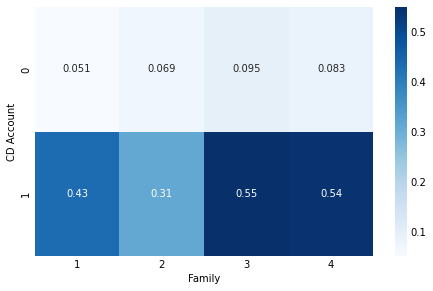

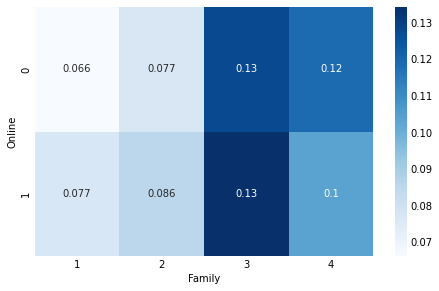

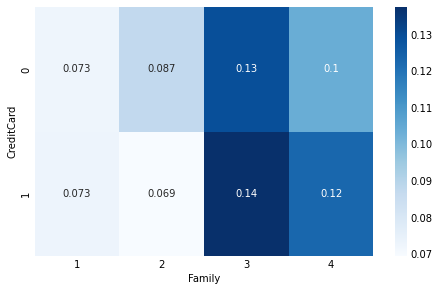

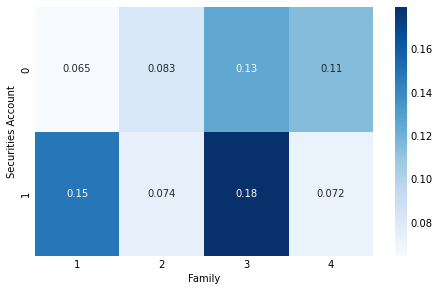

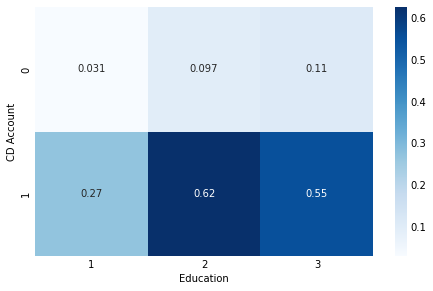

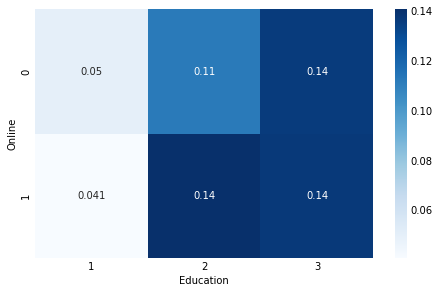

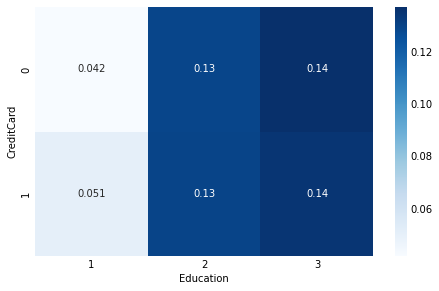

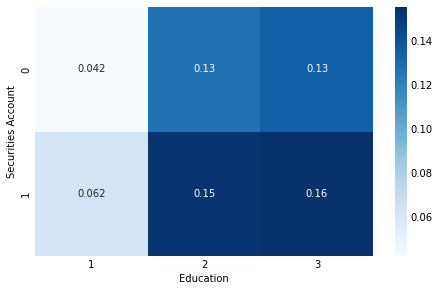

In [31]:


for col in ['Family','Education']:
    for cat in ['CD Account','Online','CreditCard','Securities Account']:
        results = pd.pivot_table(data=df, index=cat, columns=col, values='Personal Loan')
        sns.heatmap(results, cmap='Blues', annot=True)
        plt.show()

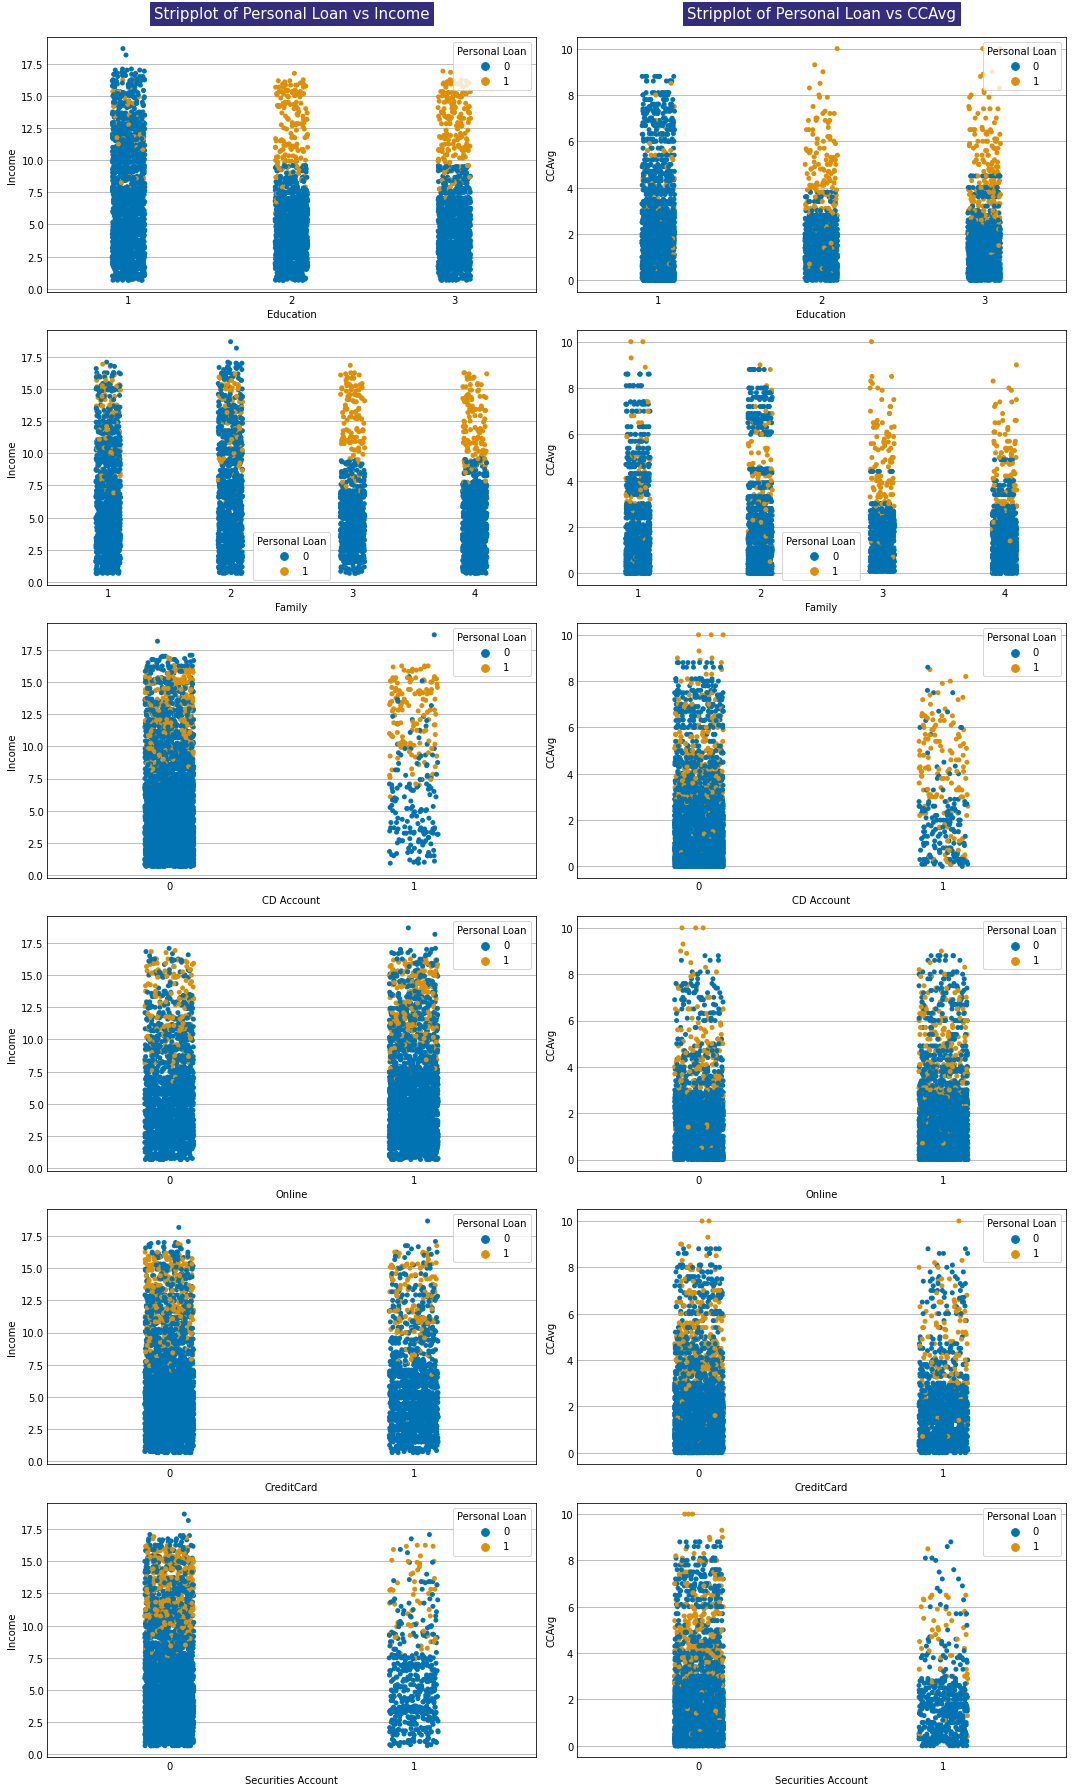

In [32]:
plt.style.use("_mpl-gallery")
fig, ax = plt.subplots(6,2,figsize=(15,25))

sns.stripplot(data=df, x='Education', y='Income', hue='Personal Loan', ax=ax[0,0])
sns.stripplot(data=df, x='Education', y='CCAvg', hue='Personal Loan', ax=ax[0,1])
sns.stripplot(data=df, x='Family', y='Income', hue='Personal Loan', ax=ax[1,0])
sns.stripplot(data=df, x='Family', y='CCAvg', hue='Personal Loan', ax=ax[1,1])
sns.stripplot(data=df, x='CD Account', y='Income', hue='Personal Loan', ax=ax[2,0])
sns.stripplot(data=df, x='CD Account', y='CCAvg', hue='Personal Loan', ax=ax[2,1])
sns.stripplot(data=df, x='Online', y='Income', hue='Personal Loan', ax=ax[3,0])
sns.stripplot(data=df, x='Online', y='CCAvg', hue='Personal Loan', ax=ax[3,1])
sns.stripplot(data=df, x='CreditCard', y='Income', hue='Personal Loan', ax=ax[4,0])
sns.stripplot(data=df, x='CreditCard', y='CCAvg', hue='Personal Loan', ax=ax[4,1])
sns.stripplot(data=df, x='Securities Account', y='Income', hue='Personal Loan', ax=ax[5,0])
sns.stripplot(data=df, x='Securities Account', y='CCAvg', hue='Personal Loan', ax=ax[5,1])
ax[0,0].set_title('Stripplot of Personal Loan vs Income',y=1.05, **FONT)
ax[0,1].set_title('Stripplot of Personal Loan vs CCAvg',y=1.05, **FONT)
plt.tight_layout()
plt.show()

Due to the fact that the desired target has a label and the problem is of classification type, we use KNN, LogisticRegression, Naive Bayes, DTs and RF algorithms.

In [33]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [34]:
# Define X and Y

x = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan'].values.reshape(-1,1)

# Model Elements

In [35]:
Model = []
FPR = []
TPR = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []
AUC = []


def delete_results():
    """Delete results of Previous models for preveing to avoid congestion in ROC charts"""
    global FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC
    del FPR[:]
    del TPR[:]
    del ACC_test[:]
    del ACC_train[:]
    del Recall[:]
    del Precision[:]
    del F1[:]
    del AUC[:]

    
#--------------------------------------------------------------------------
def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    thresh = cm.max() / 2.
    for k, (i,j) in enumerate(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, f"{names[k]}\n{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = StratifiedKFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)

    print("-"*20, f"CV for k={k}, scoring={scoring}:", "-"*20)
    print(f"CV Mean: {cv_mean:.4f}")
    print(f"CV Results: {cv_results}\n")

In [36]:
def find_fold_index(k,x):
    """
    Find the index of each fold in StratifiedKFold
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
    """
    my_fold_index = []
    j = 1
    for _, test in KFold(k).split(x):
        
        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f'fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]')
        print("-"*20)
        j += 1

In [37]:
def change_test_size(model, x, y, name):
    # try to imporve model by changing test_size
    test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
    acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test', 'Recall_train', 'Recall_test'])
    for i, test_size in enumerate(test_sizes):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
        model.fit(x_train, y_train.ravel())
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        acc_test_i = accuracy_score(y_test, y_pred_test)
        acc_train_i = accuracy_score(y_train, y_pred_train)
        rec_test_i = recall_score(y_test, y_pred_test)
        rec_train_i = recall_score(y_train, y_pred_train)
        acc_table.loc[len(acc_table.index)] = [f"{name} {i+1}", str(test_size), acc_train_i, acc_test_i, rec_train_i, rec_test_i]
    return acc_table.sort_values(by=['Recall_test'], ascending=False).style.background_gradient(cmap='summer_r')

In [38]:
def modeling(clf, x, y, test_size, classes, model_name, stratify=False):

    # split data to train and test
    if stratify:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")

    classes1 = np.unique(y_test)
    total = len(y_test)
    print(15*'-', 'Class Distribution in y_test', 15*'-')
    for c in classes1:
        n_examples = len(y_test[y_test==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")
    
    classes1 = np.unique(y_train)
    total = len(y_train)
    print(15*'-', 'Class Distribution in y_train', 15*'-')
    for c in classes1:
        n_examples = len(y_train[y_train==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")
    
    # Normalization
    # scaler = MinMaxScaler().fit(x_train)
    x_norm_train = x_train
    x_norm_test = x_test
    # define model and fit model
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test[:,1])
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_test = recall_score(y_test, y_pred_test)
    rec_train = recall_score(y_train, y_pred_train)
    pre = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # append results
    Model.append(model_name)
    FPR.append(fpr)
    TPR.append(tpr)
    ACC_test.append(acc_test)
    ACC_train.append(acc_train)
    Recall.append(rec_test)
    Precision.append(pre)
    F1.append(f1)
    AUC.append(roc_auc)

    

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(classification_report(y_test, y_pred_test, ), '\n')
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred_test)}")
    print(f"Log loss: {log_loss(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return acc_test, acc_train, rec_test, rec_train

## Logistic Regression

In [39]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [40]:
log_regression = Pipeline([('scaler', StandardScaler()), ('clf',LogisticRegression(solver="newton-cg"))])
Perform_cross_val(log_regression, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy: --------------------
CV Mean: 0.9512
CV Results: [0.9475 0.9525 0.9525 0.945  0.955  0.9525 0.9475 0.95   0.96   0.95  ]



In [41]:
Perform_cross_val(log_regression, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall: --------------------
CV Mean: 0.6304
CV Results: [0.60526316 0.63157895 0.68421053 0.63157895 0.68421053 0.60526316
 0.58974359 0.58974359 0.66666667 0.61538462]



-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)
-------------------- Confusion Matrix --------------------
[[892  12]
 [ 36  60]]


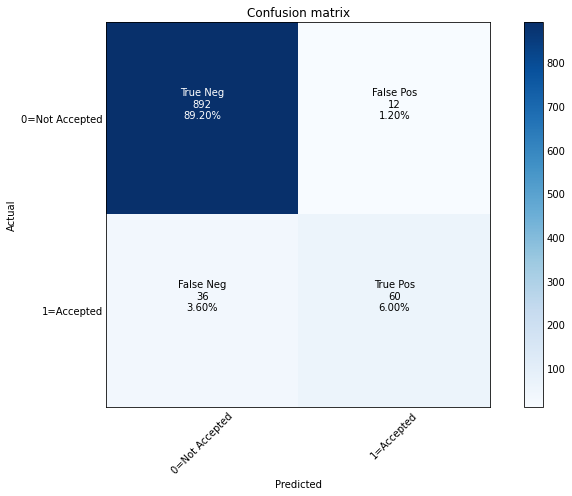

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000
 

Jaccard Score: 0.5555555555555556
Log loss: 1.6578708621248757 



In [42]:
acc_test_1_1, acc_train_1_1, rec_test_1_1, rec_train_1_1 = modeling(
    clf=log_regression,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='LogisticReg 1',
    stratify=True)

In [43]:
print(f"Recall train: {rec_train_1_1}")
print(f"Recall test: {rec_test_1_1}")

Recall train: 0.6328125
Recall test: 0.625


In [44]:
pipe_log_reg = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
change_test_size(pipe_log_reg, x, y, 'LogisticReg')

# Random Forest

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [46]:
operations = [('RF', RandomForestClassifier())]
pipe_forest = Pipeline(operations)

Perform_cross_val(pipe_forest, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy: --------------------
CV Mean: 0.9873
CV Results: [0.985  0.99   0.9925 0.985  0.99   0.98   0.99   0.98   0.9875 0.9925]



In [47]:
Perform_cross_val(pipe_forest, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall: --------------------
CV Mean: 0.8802
CV Results: [0.86842105 0.92105263 0.92105263 0.89473684 0.89473684 0.76315789
 0.8974359  0.84615385 0.87179487 0.92307692]



-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)
-------------------- Confusion Matrix --------------------
[[900   4]
 [  7  89]]


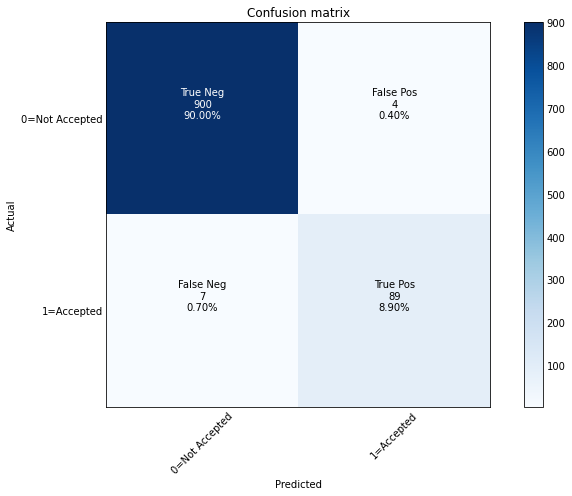

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.96      0.93      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000
 

Jaccard Score: 0.89
Log loss: 0.3799297387337392 



In [48]:
# create initial RF model without pruning
rf = RandomForestClassifier()
pipe_forest1 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_2_1, acc_train_2_1, rec_test_2_1, rec_train_2_1 = modeling(
    clf=pipe_forest1,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='Random Forest 1',
    stratify=True)

In [49]:
# check accuracy, recall and overfitting
print(f"Train Accuracy: {acc_train_2_1}")
print(f"Test Accuracy: {acc_test_2_1}")
print(f"Train Recall: {rec_train_2_1}")
print(f"Test Recall: {rec_test_2_1}")

Train Accuracy: 1.0
Test Accuracy: 0.989
Train Recall: 1.0
Test Recall: 0.9270833333333334


Explore random forest bootstrap sample size
>0.1, mean:0.756, ste:0.069
>0.2, mean:0.830, ste:0.051
>0.3, mean:0.855, ste:0.052
>0.4, mean:0.860, ste:0.048
>0.5, mean:0.865, ste:0.049
>0.6, mean:0.871, ste:0.048
>0.7, mean:0.878, ste:0.041
>0.8, mean:0.880, ste:0.045
>0.9, mean:0.872, ste:0.050
>1.0, mean:0.880, ste:0.044


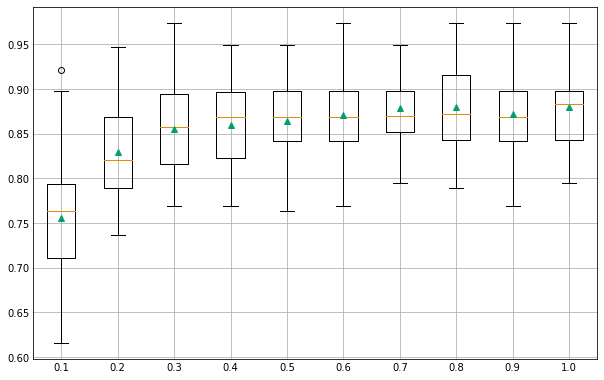

Explore random forest number of features effect
>1, mean:0.788, ste:0.065
>2, mean:0.855, ste:0.049
>3, mean:0.879, ste:0.048
>4, mean:0.890, ste:0.040
>5, mean:0.896, ste:0.040
>6, mean:0.898, ste:0.041
>7, mean:0.899, ste:0.039


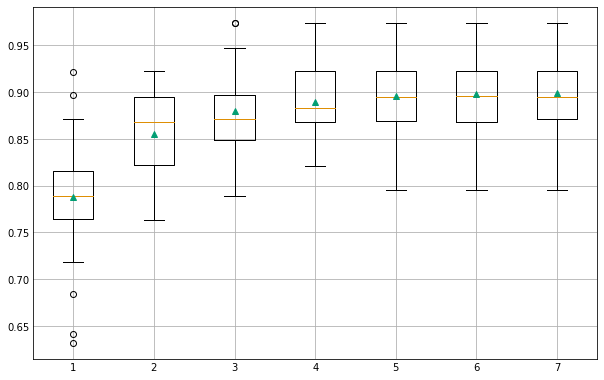

Explore random forest tree depth effect
>1, mean:0.000, ste:0.000
>2, mean:0.119, ste:0.059
>3, mean:0.432, ste:0.098
>4, mean:0.660, ste:0.074
>5, mean:0.798, ste:0.055
>6, mean:0.841, ste:0.056
>7, mean:0.861, ste:0.051
>8, mean:0.872, ste:0.050
>9, mean:0.882, ste:0.041
>None, mean:0.881, ste:0.046


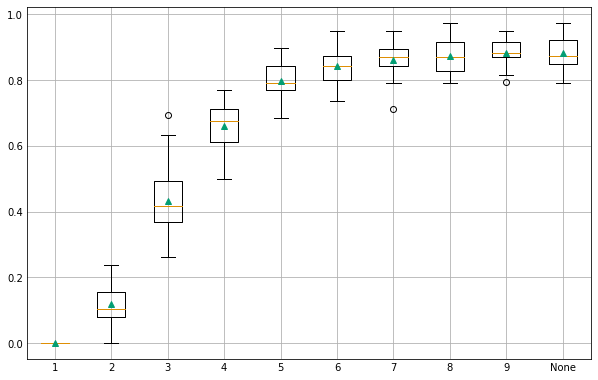

In [50]:
# parameter tuning by loops instead grid search because 
# gridsearch is very expensive and Time-consuming for this dataset
from numpy import mean
from numpy import std
from numpy import arange
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold

# get a list of models to evaluate 
# explore random forest bootstrap sample size
def get_models1():
    print("Explore random forest bootstrap sample size")
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = f'{i:.1f}'
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# get a list of models to evaluate
# explore random forest number of features effect
def get_models2():
    print("Explore random forest number of features effect")
    models = dict()
    # explore number of features from 1 to 7
    for i in range(1,8):
        models[str(i)] = RandomForestClassifier(max_features=i)
    return models

# get a list of models to evaluate
# explore random forest tree depth effect
def get_models3():
    print("Explore random forest tree depth effect")
    models = dict()
    # consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,10)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores
 
for func in [get_models1, get_models2, get_models3]:
    # get the models to evaluate
    models = func()
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        # evaluate the model
        scores = evaluate_model(model, x_train, y_train)
        # store the results
        results.append(scores)
        names.append(name)
        # summarize the performance along the way
        print(f">{name:s}, mean:{mean(scores):.3f}, ste:{std(scores):.3f}")
    # plot model performance for comparison
    plt.figure(figsize=(8, 5))
    plt.boxplot(results, labels=names, showmeans=True)
    plt.show()

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)
-------------------- Confusion Matrix --------------------
[[901   3]
 [  9  87]]


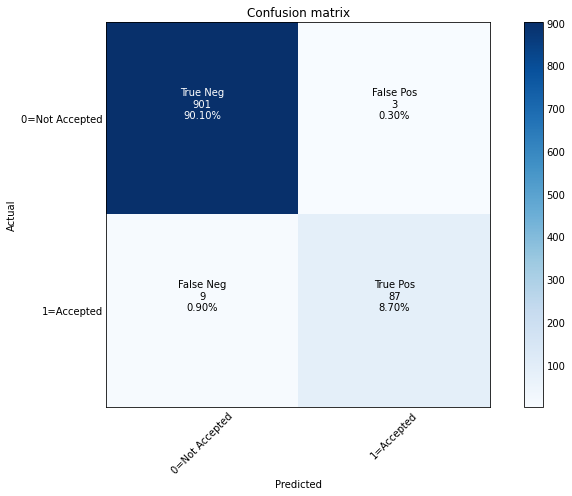

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.97      0.91      0.94        96

    accuracy                           0.99      1000
   macro avg       0.98      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000
 

Jaccard Score: 0.8787878787878788
Log loss: 0.4144677155312197 



In [51]:
# create initial RF model without pruning
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    max_samples=None,
    max_features=7,
    max_depth=None,
    class_weight='balanced_subsample',)
pipe8_2 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_2_2, acc_train_2_2, rec_test_2_2, rec_train_2_2 = modeling(
    clf=pipe8_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='RF 2',
    stratify=True)

In [52]:
print(f"Train Accuracy: {acc_train_2_2}")
print(f"Test Accuracy: {acc_test_2_2}")
print(f"Train Recall: {rec_train_2_2}")
print(f"Test Recall: {rec_test_2_2}")

Train Accuracy: 1.0
Test Accuracy: 0.988
Train Recall: 1.0
Test Recall: 0.90625


-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)
-------------------- Confusion Matrix --------------------
[[875  29]
 [  3  93]]


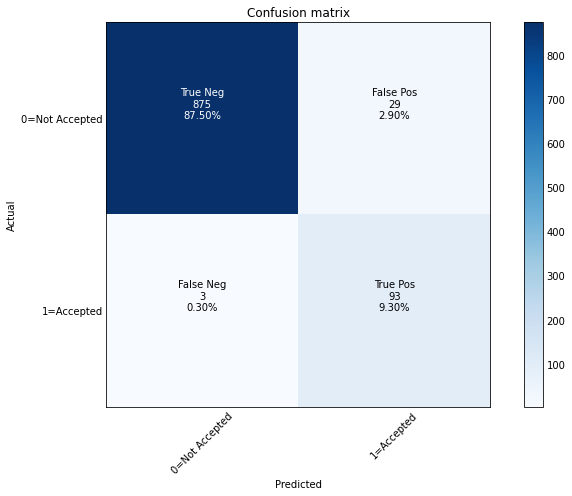

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       904
           1       0.76      0.97      0.85        96

    accuracy                           0.97      1000
   macro avg       0.88      0.97      0.92      1000
weighted avg       0.97      0.97      0.97      1000
 

Jaccard Score: 0.744
Log loss: 1.1052640329626184 



In [53]:
# create initial RF model without pruning
from sklearn.preprocessing import RobustScaler


rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=150,
    max_samples=None,
    max_features=7,
    max_depth=4,
    class_weight='balanced_subsample',
    oob_score=True
)
pipe_random4 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_2_3, acc_train_2_3, rec_test_2_3, rec_train_2_3 = modeling(
    clf=pipe_random4,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='RF 3',
    stratify=True)

Train Accuracy: 0.97675
Test Accuracy: 0.968
Train Recall: 0.9869791666666666
Test Recall: 0.96875
OOB score: 0.973


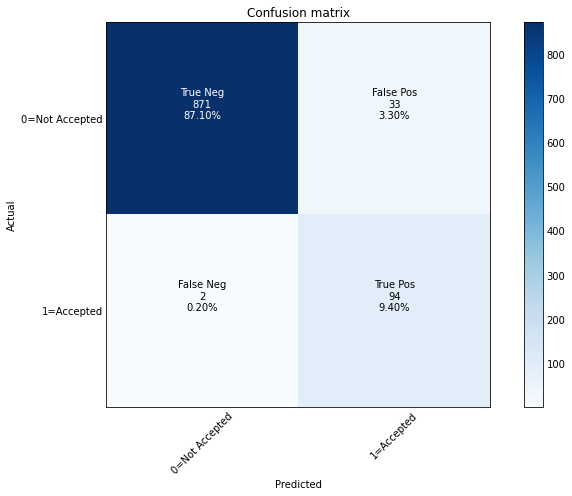

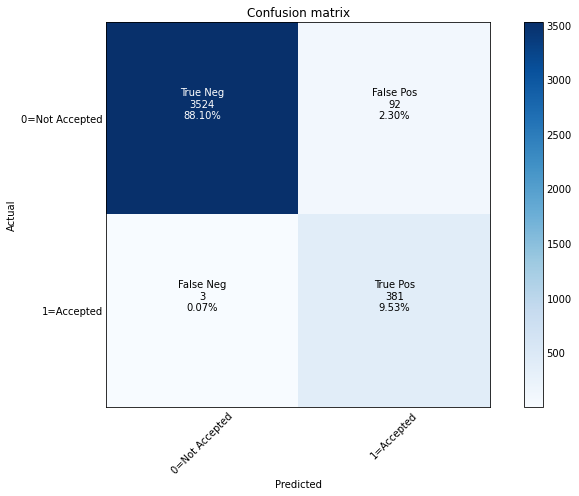

In [54]:
# print result for check overfit
print(f"Train Accuracy: {acc_train_2_3}")
print(f"Test Accuracy: {acc_test_2_3}")
print(f"Train Recall: {rec_train_2_3}")
print(f"Test Recall: {rec_test_2_3}")
print(f"OOB score: {rf.oob_score_}")

rf.fit(x_train,y_train.ravel())
y_train_predicted=rf.predict(x_train)
y_test_predicted=rf.predict(x_test)
cm = confusion_matrix(y_test, y_test_predicted)
plot_confusion_matrix2(cm=cm, classes={'Not Accepted':0, 'Accepted':1}, )
# print(classification_report(y_test, y_test_predicted))
cm = confusion_matrix(y_train, y_train_predicted)
plot_confusion_matrix2(cm=cm, classes={'Not Accepted':0, 'Accepted':1}, )
# print(classification_report(y_train, y_train_predicted))

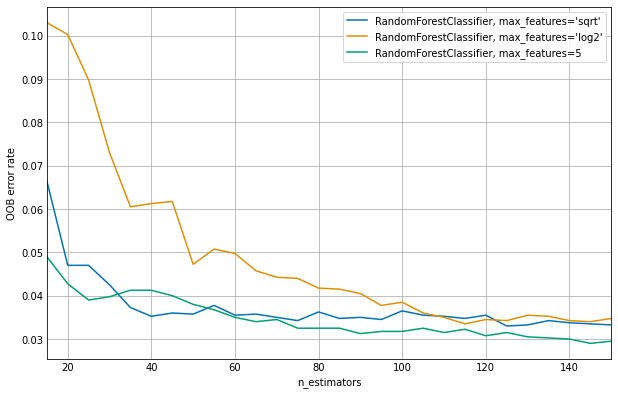

In [55]:
from typing import OrderedDict
import matplotlib.pyplot as plt

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features='sqrt',
        ),
    ),
    
    
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features="log2",
        ),
    ),
    
    
    (
        "RandomForestClassifier, max_features=5",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features=5,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150


for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.

plt.figure(figsize=(8, 5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)


plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [56]:
change_test_size(pipe_random4, x, y, 'Random Forest')

In [57]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [58]:
x_check = df.drop('Personal Loan', axis=1)
y_check = df['Personal Loan'].values.reshape(-1,1)

In [59]:
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(x_check, y_check, test_size=0.2, random_state=0, stratify=y_check)
pipe_random4.fit(x_train, y_train.ravel())
y_pred_test = pipe_random4.predict(x_test)
y_pred_train = pipe_random4.predict(x_train)
x_test.insert(11,'Personal Loan', y_test)
x_test.insert(12, 'Pred', y_pred_test)
x_train.insert(11,'Personal Loan', y_train)
x_train.insert(12, 'Pred', y_pred_train)

# Count Wrong Prediction

In [60]:
fn_rows_train = x_train[(x_train['Personal Loan'] == 1) & (x_train['Pred'] == 0)]
fn_rows_test = x_test[(x_test['Personal Loan'] == 1) & (x_test['Pred'] == 0)]
fn_rows = pd.concat([fn_rows_train, fn_rows_test])
fn_rows

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
3403   54          29    6.83       3    3.7          2         0   
1518   43          17    5.33       4    3.0          3       221   
323    59          34    8.25       1    4.4          1         0   
1126   32           8    8.67       2    3.7          1         0   
1069   44          18    6.25       2    3.5          1         0   
349    26           2    5.00       2    3.0          1       132   
1577   34           8    5.42       1    3.0          1       227   
1062   47          21    6.92       1    3.8          1        97   
2345   65          40    7.42       1    4.1          1       299   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  Pred  
3403                   0           0       1           0              1     0  
1518                   0           0       1           0              1     0  
323                    0           0       0           0              1     0  
1126                   0           0       0           1              1     0  
1069                   0           0       1           0              1     0  
349                    0           0       0           0              1     0  
1577                   0           0       1           0              1     0  
1062                   0           0       0           0              1     0  
2345                   0           1       1           0              1     0

In [61]:
print(f'Number of Wrong Prediction: {fn_rows.shape[0]}')

Number of Wrong Prediction: 9


# Conclusion


## Model Performance

The final model demonstrates high accuracy, with only **9** customers misclassified.
Most predictions are correct, indicating the model is effective for the majority of cases.

### Analysis of Misclassified Cases

The misclassified customers generally have:
- Lower income (not in the high-income group, i.e., less than $10,000).
- Education level 1 (Undergraduate).
- Low average credit card spending (CCAvg).
- These cases represent exceptions and may not fit the typical customer profiles identified by the model.
Customer Profiling

### High Profile Clients:
- Higher income.
- Advanced or graduate-level education.
- Family size of 3-4 members.
- High CCAvg.

### Medium Profile Clients:
- Medium income.
- Graduate-level education.
- Family size of 3-4 members.
- Medium CCAvg.

### Low Profile Clients:
- Lower income.
- Undergraduate education.
- Family size of 3-4 members.
- Low CCAvg.

## Feature Importance
- Features such as CCAvg and Mortgage also influence the likelihood of a customer accepting a personal loan, as observed in the exploratory data analysis.

# Business Recommendations

**Primary Target:** Focus on high-profile clients by offering personalized services, such as dedicated relationship managers and competitive interest rates, to increase the likelihood of loan acceptance.
Secondary Target: Medium-profile clients should be the next focus group for marketing and engagement strategies.
The model may not effectively identify exceptional cases where low-profile customers are willing to take a personal loan; additional strategies may be needed to capture these outliers.

In [62]:
# fit final model on all of data (train + test)
final_model = pipe_random4
final_model.fit(x_check, y_check)

# define sample data
sample = pd.DataFrame({'Age':[42], 'Experience':[16], 'Income':[30/12], 'Family':[4], 'CCAvg':[1.2], 'Education':[2], 'Mortgage':[0], 'Securities Account':[1], 'CD Account':[0], 'Online':[1], 'CreditCard':[0],})
print(f"Age: {sample['Age'].values[0]}\n"
      f"Experience: {sample['Experience'].values[0]}\n"
      f"Income: {sample['Income'].values[0]}\n"
      f"Family: {sample['Family'].values[0]}\n"
      f"CCAvg: {sample['CCAvg'].values[0]}\n"
      f"Education: {sample['Education'].values[0]}\n"
      f"Mortgage: {sample['Mortgage'].values[0]}\n"
      f"Securities Account: {sample['Securities Account'].values[0]}\n"
      f"CD Account: {sample['CD Account'].values[0]}\n"
      f"Online: {sample['Online'].values[0]}\n"
      f"CreditCard: {sample['CreditCard'].values[0]}\n")

# predict sample data
result = final_model.predict(sample)

print('-'*50)
print(f"Predict whether the customer will accept a personal loan? (0:No & 1:Yes): {result}")

Age: 42
Experience: 16
Income: 2.5
Family: 4
CCAvg: 1.2
Education: 2
Mortgage: 0
Securities Account: 1
CD Account: 0
Online: 1
CreditCard: 0

--------------------------------------------------
Predict whether the customer will accept a personal loan? (0:No & 1:Yes): [0]
